# Import Library & Load Datasets

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns

In [184]:
df = pd.read_csv(r"C:\Users\thora\OneDrive\Documents\Machine Learning\Project\ML case Study.csv",header=0)

In [185]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [186]:
colleges = pd.read_csv(r"C:\Users\thora\OneDrive\Documents\Machine Learning\Project\Colleges.csv",header=0)

In [187]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [188]:
cities = pd.read_csv(r"C:\Users\thora\OneDrive\Documents\Machine Learning\Project\cities.csv",header=0)

In [189]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# Convert Categorical data to Numeric Values

In [190]:
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

In [191]:
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [192]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)

In [193]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523,3,66,19,71406.58
1,2,Ajmer,Executive,57081,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,3,Ajmer,Executive,49010,2,81,33,82092.39
4,1,Durgapur,Executive,57879,4,74,32,73878.10


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 99.4+ KB


In [195]:
metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

In [196]:
for item in df.City:
    if item in metro_city:
        df["City"].replace(item,1,inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item,0,inplace=True)

In [197]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523,3,66,19,71406.58
1,2,0,Executive,57081,1,84,18,68005.87
2,3,0,Executive,60347,2,52,28,76764.02
3,3,0,Executive,49010,2,81,33,82092.39
4,1,0,Executive,57879,4,74,32,73878.10


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 99.4+ KB


In [199]:
df = pd.get_dummies(df, columns=['Role'], drop_first=True)

In [200]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523,3,66,19,71406.58,1
1,2,0,57081,1,84,18,68005.87,0
2,3,0,60347,2,52,28,76764.02,0
3,3,0,49010,2,81,33,82092.39,0
4,1,0,57879,4,74,32,73878.10,0


In [201]:
# Step 2: Feature Scaling
scaler = StandardScaler()
df[['Previous CTC', 'Graduation Marks', 'EXP (Month)','Previous job change']] = scaler.fit_transform(df[['Previous CTC', 'Graduation Marks','EXP (Month)','Previous job change']])

In [294]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.042154,-0.055060,0.003539,0.011752,-0.025930,-0.014749
City,-0.014946,1.000000,0.003851,0.051670,-0.018616,-0.023613,-0.026940,-0.048671
Previous CTC,0.042154,0.003851,1.000000,0.006280,-0.032854,0.118746,0.246917,0.012643
Previous job change,-0.055060,0.051670,0.006280,1.000000,0.019267,0.023488,0.009485,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032854,0.019267,1.000000,-0.057061,-0.004665,0.017858
EXP (Month),0.011752,-0.023613,0.118746,0.023488,-0.057061,1.000000,0.310451,-0.026751
CTC,-0.025930,-0.026940,0.246917,0.009485,-0.004665,0.310451,1.000000,0.611024
Role_Manager,-0.014749,-0.048671,0.012643,-0.017150,0.017858,-0.026751,0.611024,1.000000


In [203]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1.589000e+03,1.589000e+03,1.589000e+03,1.589000e+03,1589.000000,1589.000000
mean,1.975456,0.514160,5.410678e-16,-1.028476e-16,-1.358259e-16,-8.048942e-17,75353.278798,0.206419
std,0.838330,0.499957,1.000315e+00,1.000315e+00,1.000315e+00,1.000315e+00,12587.288237,0.404862
min,1.000000,0.000000,-2.784925e+00,-1.360523e+00,-1.664737e+00,-1.492061e+00,53020.320000,0.000000
25%,1.000000,0.000000,-7.515949e-01,-4.704978e-01,-9.279871e-01,-9.248639e-01,66902.350000,0.000000
50%,2.000000,1.000000,-3.418751e-02,4.195272e-01,9.694633e-03,-3.167953e-03,73028.670000,0.000000
75%,3.000000,1.000000,6.899836e-01,1.309552e+00,8.803991e-01,8.476283e-01,80588.670000,0.000000
max,3.000000,1.000000,3.365719e+00,1.309552e+00,1.684126e+00,1.769324e+00,123416.990000,1.000000


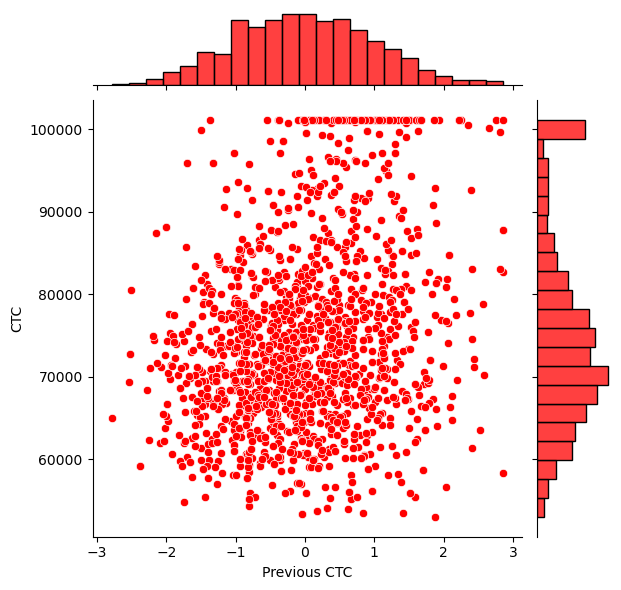

In [250]:
sns.jointplot(x='Previous CTC',y='CTC',data=df,color='red')

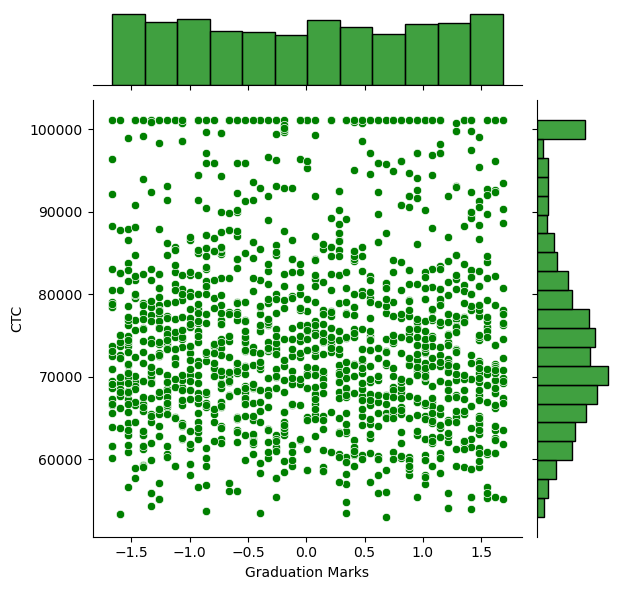

In [249]:
sns.jointplot(x='Graduation Marks',y='CTC',data=df,color='green')

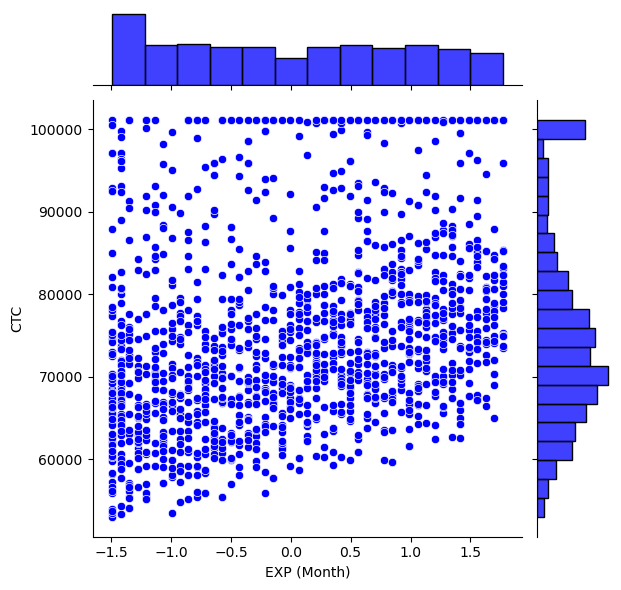

In [248]:
sns.jointplot(x='EXP (Month)',y='CTC',data=df,color='blue')

In [207]:
Q1 = df["Previous CTC"].quantile(0.25)
Q3 = df["Previous CTC"].quantile(0.75)
IQR = Q3 - Q1

In [208]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [210]:
outliers = df[(df['Previous CTC'] < lower_bound) | (df['Previous CTC'] > upper_bound)]

In [211]:
print("Outliers in 'Previous CTC' column:")
print(outliers)

Outliers in 'Previous CTC' column:
      College  City  Previous CTC  Previous job change  Graduation Marks  \
116         3     1      3.365719            -1.360523         -0.660078   
860         1     1      3.046170             1.309552          0.210626   
1088        3     1      3.200984             1.309552          1.014354   
1317        1     0      3.089007            -0.470498         -0.392169   
1454        1     1      3.365719            -1.360523         -0.660078   

      EXP (Month)        CTC  Role_Manager  
116      1.343926   87831.62             0  
860     -0.144967  110338.25             1  
1088     0.918528   82684.17             0  
1317    -1.492061   58309.56             0  
1454     1.343926   87831.62             0  


In [213]:
df['Previous CTC'] = df['Previous CTC'].clip(lower_bound, upper_bound)

In [215]:
print("After outlier treatment:")
print(df['Previous CTC'].describe())

After outlier treatment:
count    1589.000000
mean       -0.001136
std         0.996832
min        -2.784925
25%        -0.751595
50%        -0.034188
75%         0.689984
max         2.852351
Name: Previous CTC, dtype: float64


In [217]:
Q1_Graduation = df['Graduation Marks'].quantile(0.25)
Q3_Graduation = df['Graduation Marks'].quantile(0.75)
IQR_Graduation = Q3_Graduation - Q1_Graduation

In [218]:
Q1_EXP = df['EXP (Month)'].quantile(0.25)
Q3_EXP = df['EXP (Month)'].quantile(0.75)
IQR_EXP = Q3_EXP - Q1_EXP


In [219]:
Q1_CTC = df['CTC'].quantile(0.25)
Q3_CTC = df['CTC'].quantile(0.75)
IQR_CTC = Q3_CTC - Q1_CTC


In [220]:
outliers_Graduation = df[(df['Graduation Marks'] < Q1_Graduation - 1.5 * IQR_Graduation) | (df['Graduation Marks'] > Q3_Graduation + 1.5 * IQR_Graduation)]
outliers_EXP = df[(df['EXP (Month)'] < Q1_EXP - 1.5 * IQR_EXP) | (df['EXP (Month)'] > Q3_EXP + 1.5 * IQR_EXP)]
outliers_CTC = df[(df['CTC'] < Q1_CTC - 1.5 * IQR_CTC) | (df['CTC'] > Q3_CTC + 1.5 * IQR_CTC)]


In [221]:
df_no_outliers = df[~df.index.isin(outliers_Graduation.index) & ~df.index.isin(outliers_EXP.index) & ~df.index.isin(outliers_CTC.index)]

In [251]:
# Print the number of potential outliers and the new shape of the DataFrame without outliers
print("Number of potential outliers in Graduation Marks:", len(outliers_Graduation))
print("Number of potential outliers in EXP (Month):", len(outliers_EXP))
print("Number of potential outliers in CTC:", len(outliers_CTC))
print("New shape of the DataFrame without outliers:", df_no_outliers.shape)

Number of potential outliers in Graduation Marks: 0
Number of potential outliers in EXP (Month): 0
Number of potential outliers in CTC: 94
New shape of the DataFrame without outliers: (1495, 8)


In [223]:
# Calculate the IQR for 'CTC'
Q1_CTC = df['CTC'].quantile(0.25)
Q3_CTC = df['CTC'].quantile(0.75)
IQR_CTC = Q3_CTC - Q1_CTC


In [224]:
lower_bound = Q1_CTC - 1.5 * IQR_CTC
upper_bound = Q3_CTC + 1.5 * IQR_CTC

In [225]:
df['CTC'] = np.where(df['CTC'] < lower_bound, lower_bound, df['CTC'])
df['CTC'] = np.where(df['CTC'] > upper_bound, upper_bound, df['CTC'])

In [231]:
num_outliers_capped = len(df[(df['CTC'] < lower_bound) | (df['CTC'] > upper_bound)])
print("Number of outliers capped:", num_outliers_capped)

Number of outliers capped: 0


In [252]:
print("Number of potential outliers in Graduation Marks:", len(outliers_Graduation))
print("Number of potential outliers in EXP (Month):", len(outliers_EXP))
print("Number of potential outliers in CTC:", num_outliers_capped)
print("New shape of the DataFrame without outliers:", df.shape)

Number of potential outliers in Graduation Marks: 0
Number of potential outliers in EXP (Month): 0
Number of potential outliers in CTC: 0
New shape of the DataFrame without outliers: (1589, 8)


In [273]:
#  Split the data into features (X) and target (y)
X = df.drop('CTC', axis=1)
y = df['CTC']

In [254]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,0.000683,0.419527,0.411558,-1.421162,1
1,2,0,0.234859,-1.360523,1.617149,-1.492061,0
2,3,0,0.725756,-0.470498,-0.526124,-0.783065,0
3,3,0,-0.978255,-0.470498,1.416217,-0.428566,0
4,1,0,0.354803,1.309552,0.947376,-0.499466,0


In [255]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [274]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
# Step 4: Model Selection and Step 5: Model Training
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [276]:
# Step 6: Model Evaluation
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

In [277]:
# Calculate metrics
mse_test= mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train,y_pred_train)

In [278]:
print("Mean Squared Error:", mse_test,mse_train)
print("Root Mean Squared Error:", rmse_test,rmse_train)
print("R-squared:", r2_test,r2_train)

Mean Squared Error: 66013643.89960201 63184933.08760053
Root Mean Squared Error: 8124.878085214695 7948.895085960094
R-squared: 0.5790435058024451 0.5026557995488168


In [286]:
#Model predictions
new_data = pd.DataFrame({
    'College':[3,3],
    'City':[1,0],
    'Previous CTC': [25000, 500000],
    'Previous job change': [1, 0],
    'Graduation Marks': [75, 80],
    'EXP (Month)': [2, 4], 
    'Role_Manager':[0,1]
})

In [290]:
 new_data_scaled = scaler.fit_transform(new_data)


In [292]:
predictions = rf_model.predict(new_data)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [293]:
print(predictions)

[80046.43039 99494.84159]


In [261]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [282]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [283]:
# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [284]:
# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)

In [285]:
# Calculate the R-squared score for the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf1 = r2_score(y_train,y_pred_train)
print("R-squared score for Random Forest Regression:", r2_rf,r2_rf1)

R-squared score for Random Forest Regression: 0.6292452755450832 0.9463873205904787


In [163]:
data = {'Name': ['John', 'Alice', 'Bob'],
        'Age': [25, 30, 22],
        'City': ['New York', 'London', 'Paris']}


In [170]:
df = pd.DataFrame(data)

In [171]:
df.head()

,Name,Age,City
0,John,25,New York
1,Alice,30,London
2,Bob,22,Paris


In [172]:
print(df.iloc[, 1])  # Output: Alice

Alice


In [297]:
x = "Hello"[0]

In [298]:
df = np.array([1, 2, 3, 4, 5, 6, 7])

In [301]:
print(df[3:])

[4 5 6 7]


In [303]:
str1 = "DYnative"
print(str1[1:4])

Yna
